In [1]:
import Random 

### Rozmieszczenie każdych możliwych pakietów żywnosciowych

In [10]:
function environment2(n,m)
    if n % 3 != 0
        throw(DomainError(size, "incorrect size"))
    end
    
    Environment = zeros(Int64, n, m)
    
    for i in 2:3:n
        Environment[i,:] = ones(Int64, 1, m)
    end
    
    liczba = floor((n/3*m) * 0.08)  #szacowanie około 8? % wszystkich możliwych pakietów
    ilosc_pakietow = rand(1:liczba) + 5  #randomowe przypisanie konkretnej ilości danego rodzaju pakietów w danym wywołaniu
    
    for i in 1:1:ilosc_pakietow
        z = findall(x -> x == 1, Environment)
        Environment[rand(z)] = -1
    end
    
    for i in 1:1:ilosc_pakietow
        z = findall(x -> x == 1, Environment)
        Environment[rand(z)] = 0
    end
    
    return Environment
end

environment2 (generic function with 1 method)

In [12]:
environment2(21, 21)

21×21 Array{Int64,2}:
 0  0   0  0  0  0  0   0  0  0   0   0  0  0   0   0   0  0  0  0   0
 1  1   1  1  1  1  1  -1  1  1   0   1  1  1   1   1   1  0  1  1   1
 0  0   0  0  0  0  0   0  0  0   0   0  0  0   0   0   0  0  0  0   0
 0  0   0  0  0  0  0   0  0  0   0   0  0  0   0   0   0  0  0  0   0
 1  1   1  1  1  1  1   1  1  1   1  -1  0  1   1   1   1  1  1  1   0
 0  0   0  0  0  0  0   0  0  0   0   0  0  0   0   0   0  0  0  0   0
 0  0   0  0  0  0  0   0  0  0   0   0  0  0   0   0   0  0  0  0   0
 0  0   1  1  1  1  1   1  1  1   1   1  1  1   1   0   1  1  1  1   1
 0  0   0  0  0  0  0   0  0  0   0   0  0  0   0   0   0  0  0  0   0
 0  0   0  0  0  0  0   0  0  0   0   0  0  0   0   0   0  0  0  0   0
 1  1   1  1  1  1  1   0  1  1   1   1  1  1  -1   1   1  1  1  1   1
 0  0   0  0  0  0  0   0  0  0   0   0  0  0   0   0   0  0  0  0   0
 0  0   0  0  0  0  0   0  0  0   0   0  0  0   0   0   0  0  0  0   0
 1  1  -1  1  1  1  1   1  1  1   1   1  1  1   1   1  

### !!! ZERA JAKO PAKIET I JAKO WOLNE MIEJSCE KOLIDUJĄ!

### Funkcja usuwająca konkretną rzecz z macierzy

In [41]:
function remove!(a, item)
    deleteat!(a, findall(x->x==item, a))
    return a
end

remove! (generic function with 1 method)

### Funkcja generująca rozstawienie ptaków w środowisku

In [63]:
function find_place(macierz, g, ja, ch_g, ch_j)
    n = size(macierz)[1]
    m = size(macierz)[2]
    slots = 2*n*m/3
    amount_of_birds = g + ja + ch_g + ch_j
    birds = [7, 10, 70, 100]
    any_bird = [g, ja, ch_g, ch_j]
    
    if amount_of_birds > slots
        for i in 1:slots
            pustka = findall(x -> x == 0, any_bird)
            if length(pustka) != 0 
                n = birds[pustka[1]]
                any_bird = remove!(any_bird, 0)
                birds = remove!(birds, n)
            end
            number = rand(1:length(birds))
            current_bird = birds[number]
            z = findall(x -> x == 0, macierz)
            macierz[rand(z)] = current_bird
            any_bird[number] -= 1
        end
        
    elseif slots > amount_of_birds
        for i in 1:amount_of_birds
            pustka = findall(x -> x == 0, any_bird)
            if length(pustka) != 0 
                n = birds[pustka[1]]
                any_bird = remove!(any_bird, 0)
                birds = remove!(birds, n)
            end
            number = rand(1:length(birds))
            current_bird = birds[number]
            z = findall(x -> x == 0, macierz)
            macierz[rand(z)] = current_bird
            any_bird[number] -= 1
        end
    end
    return macierz
end

find_place (generic function with 1 method)

In [64]:
a = environment2(9, 9)
find_place(a, 10, 10, 12, 12)


9×9 Array{Int64,2}:
   7    0  100    0    0  70   10    7  100
 100   10   70   -1    0   1    1    1    1
 100    0    0  100    0  70    0    0   10
  70  100    7    0   10  10    7   10    0
   1    1    1    1   -1  -1    1    1    1
  70   10  100   10   10  70  100  100    0
  70    0    0    0  100   0    7   70  100
  -1    1   70    7    1  -1   -1    7   -1
   0  100   70    7   10   7   70    7   70

### Funkcja decydująca o dalszym losie ptaszków

In [5]:
function roll_for_pakiet(some_fate)
    fate = rand(1:101)
    if fate <= some_fate
        return true
    end
end

roll_for_pakiet (generic function with 1 method)

### Potyczki przy pakietach

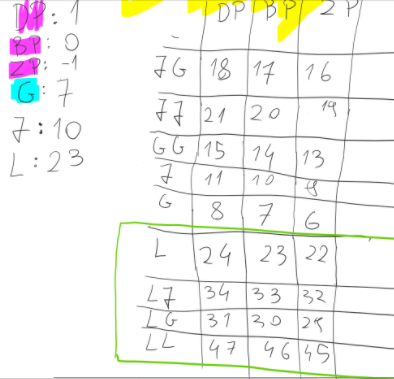

In [6]:
function death(bird, deadliness)
    for i in 1:bird
        if roll_for_pakiet(deadliness)==true
            bird -= 1
        end
    end
    return bird
end

death (generic function with 1 method)

In [7]:
function sickness(ch_g, ch_j, deadliness)
    ch_g = death(ch_g, deadliness)
    
    ch_j = death(ch_j, deadliness)
    return ch_g, ch_j
end

sickness (generic function with 1 method)

In [13]:
function potyczki(n,m,macierz, g, ja,ch_g = 0,ch_j = 0)
    for i in 2:3:n, j in 1:m    
        suma = macierz[i-1,j] + macierz[i,j] + macierz[i+1,j]
        if suma == 18
            #Jast, Goł dobry pakiet
            if roll_for_pakiet(50) == true
                g -= 1
            ja = ja + 1
            end
        elseif suma == 15
            #Goł, Goł dobry pakiet
            g = g
        elseif suma == 21
            #Jast, Jast dobry pakiet
            ja = ja - 2
        elseif suma == 8
            #Goł dobry pakiet
            g += 2
        elseif suma == 11
            #Jast dobry pakiet
            ja += 2
        elseif suma == 81
            #Jast Ch_Goł dobry pakiet
                
        elseif suma == 108
            #Ch_Jast Goł dobry pakiet
        elseif suma == 201
            #Ch_Jast Ch_Jast dobry pakiet
        elseif suma == 141
            #Ch_Goł Ch_Goł dobry pakiet
                
            
        elseif suma == 17
            #Jast Goł pusty pakiet
            g = g-1
        elseif suma == 20
            #Jast Jast pusty pakiet
            ja = ja-1
        elseif suma == 14
            #Goł Goł pusty pakiet
            g = g-2
        elseif suma == 10
            #Jast pusty pakiet
            ja = ja-1
        elseif suma == 7
            #Goł pusty pakiet
            g = g-1
                
         elseif suma == 80
            #Jast Ch_Goł pusty pakiet
                
        elseif suma == 107
            #Ch_Jast Goł pusty pakiet
        elseif suma == 200
            #Ch_Jast Ch_Jast pusty pakiet
        elseif suma == 140
            #Ch_Goł Ch_Goł pusty pakiet
            
        elseif suma == 16
            #Jast Goł zatruty pakiet
            g -= 1
            ja -= 1
            if roll_for_pakiet(20) == true
                ch_j += 1
            end    
        elseif suma == 19
            #Jast Jast zatruty pakiet
            ja -= 1
        elseif suma == 13
            #Goł Goł zatruty pakiet
            g -= 2
            if roll_for_pakiet(6) == true
                ch_g += 2
            end
        elseif suma == 9
            #Jast  zatruty pakiet
            ja = ja-1
        elseif suma == 6
            #Goł zatruty pakiet
            g = g-1 
            if roll_for_pakiet(20) == true
                ch_g += 1
            end        
         elseif suma == 79
            #Jast Ch_Goł zatruty pakiet
                
        elseif suma == 106
            #Ch_Jast Goł zatruty pakiet
        elseif suma == 199
            #Ch_Jast Ch_Jast zatruty pakiet
        elseif suma == 139
            #Ch_Goł Ch_Goł zatruty pakiet
        end 
    end
    sick_birds = sickness(ch_g, ch_j, 80)
    ch_g = sick_birds[1]
    ch_j = sick_birds[2]

    return g,ja, ch_g, ch_j
end

potyczki (generic function with 3 methods)